In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os, json, requests, pickle
from scipy.stats import skew
#from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
#import scipy.stats as st
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

#from tabulate import tabulate #pretty print of tables. source: http://txt.arboreus.com/2013/03/13/pretty-print-tables-in-python.html
#from shapely.geometry import Point,Polygon,MultiPoint
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1.Data Exploratory Analysis and Data Preprocessing

In [2]:
# read the data and print the dimension
df = pd.read_csv('User_Part3.txt',header=None)
df.head()# Print the size of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows: 351088
Number of columns:  173


In [3]:
#rename the column
df.columns = ['x_' + str(col) for col in df.columns]
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       ...
       'x_163', 'x_164', 'x_165', 'x_166', 'x_167', 'x_168', 'x_169', 'x_170',
       'x_171', 'x_172'],
      dtype='object', length=173)

In [4]:
# check the num of missings for all the columns
df.head()
df.isnull().sum().sort_values(ascending=False)

x_81     351088
x_82     351088
x_80     351088
x_34     351071
x_25     351071
x_52     351040
x_55     351021
x_35     350968
x_26     350968
x_46     350919
x_43     350919
x_53     350913
x_58     350889
x_64     350800
x_61     350771
x_56     350751
x_49     350636
x_77     350558
x_27     350477
x_36     350477
x_37     350408
x_40     350408
x_54     350382
x_148    350374
x_47     350121
x_44     350121
x_59     350117
x_74     350028
x_57     349940
x_78     349719
          ...  
x_127      3759
x_114      3759
x_104      3759
x_105      3759
x_106      3759
x_107      3759
x_108      3759
x_109      3759
x_110      3759
x_111      3759
x_112      3759
x_126      3759
x_113      3759
x_115      3759
x_116      3759
x_117      3759
x_118      3759
x_119      3759
x_120      3759
x_122      3759
x_123      3759
x_124      3759
x_125      3759
x_3           1
x_1           1
x_2           1
x_0           1
x_4           1
x_5           1
x_172         0
Length: 173, dtype: int6

In [30]:
# check the missing percentage for all the columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['x_172'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data.to_excel('missing.xls')
missing_data.loc['x_171']


Total_Missing      91532.00000
Percent_Missing        0.26071
Name: x_171, dtype: float64

In [6]:
# the target column is missing 91532
df['x_171'].value_counts(dropna=False)

 0.0    181443
NaN      91532
 1.0     78113
Name: x_171, dtype: int64

In [47]:
# freq table for target var
df['x_171'].value_counts(dropna=False)/len(df['x_171'])

 0.0    0.516802
NaN     0.260710
 1.0    0.222488
Name: x_171, dtype: float64

In [7]:
# drop the rows with missing target var
df1 = df[df['x_171'].notnull()]
print("Number of rows:", df1.shape[0])
print("Number of columns: ", df1.shape[1])

Number of rows: 259556
Number of columns:  173


In [8]:
# check the completeness of data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1['x_172'].count()).sort_values(ascending=False)
missing_data1 = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data1.to_excel('missing1.xls')
missing_data1.loc['x_171']

Total_Missing      0.0
Percent_Missing    0.0
Name: x_171, dtype: float64

In [9]:
# check if there is duplicate user_id
df1_duplicate=df1[df1.duplicated(['x_172'], keep=False)]
df1_duplicate.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172


In [31]:
# drop the features that have more than 50% missings
df1.columns[df1.isnull().mean() < 0.5]
df2=df1[df1.columns[df1.isnull().mean() < 0.5]]
df1.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172
count,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,235371.0,235371.000000,235371.000000,117539.000000,...,245479.000000,245479.000000,245479.000000,22906.000000,1331.000000,94428.000000,94428.000000,94428.000000,259556.000000,259556.000000
mean,0.000297,0.001803,0.008599,0.000100,0.000959,0.004257,0.0,0.000034,0.000280,3.081905,...,0.008681,0.057699,0.254189,4.511740,4.528092,0.016489,0.102808,0.484973,0.300949,175646.312141
std,0.017221,0.042424,0.092333,0.010008,0.030958,0.065109,0.0,0.005830,0.016743,4.848717,...,0.148351,0.441876,1.194557,0.724404,0.768588,0.233204,0.606078,1.994883,0.458671,101314.601869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,87867.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,175815.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,263481.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,690.000000,...,24.000000,48.000000,171.000000,5.000000,5.000000,33.000000,67.000000,281.000000,1.000000,351087.000000


In [32]:
# fill the missings with columns mean.
df2=df2.fillna(df2.mean())
df2.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_67,...,x_142,x_154,x_155,x_156,x_159,x_163,x_164,x_165,x_171,x_172
count,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.0,259556.000000,259556.000000,259556.000000,...,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000,259556.000000
mean,0.000297,0.001803,0.008599,0.000100,0.000959,0.004257,0.0,0.000034,0.000280,0.970298,...,1.625766,0.089200,0.515953,2.045241,1.347805,0.008681,0.057699,0.254189,0.300949,175646.312141
std,0.017221,0.042424,0.092333,0.010008,0.030958,0.065109,0.0,0.005552,0.015944,0.174015,...,231.537747,0.615258,1.716905,4.627163,1.502041,0.144272,0.429727,1.161712,0.458671,101314.601869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.970298,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,87867.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175815.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.515953,2.045241,1.000000,0.000000,0.000000,0.000000,1.000000,263481.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000,...,104640.000000,135.000000,183.000000,527.000000,74.000000,24.000000,48.000000,171.000000,1.000000,351087.000000


In [12]:
# recheck the missingness
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2['x_172'].count()).sort_values(ascending=False)
missing_data2 = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data2.to_excel('missing2.xls')

# 2. Building the Models

In [13]:
# split the training and test data set and define X and Y matrix
train, test = train_test_split(df2, test_size=0.2)
X_train = train.drop(["x_172","x_171"], axis=1)
Y_train = train["x_171"]
X_test = test.drop(["x_172","x_171"], axis=1)
Y_test = test["x_171"]

In [14]:
# build several preliminary models to choose the best
# lieanr model with stochastic gradient descent (SGD) 
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")


61.63 %


In [36]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


90.74 %


In [16]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")


69.65 %


In [17]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")



42.7 %


In [46]:
# Random Forrest showed the best performance 
results = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent'],
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
90.74,Random Forest
69.65,Logistic Regression
61.63,Stochastic Gradient Decent
42.70,Support Vector Machines


In [20]:
# 5-fold Corssvalidation to reaffirm the model accuracy and its variance which gives a more realistic evaluation 
# of model performance
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=150)
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.84420525  0.84439789  0.84418117  0.84654097  0.84632055]
Mean: 0.845129169113
Standard Deviation: 0.00106767655554


In [38]:
#Apply model to the test data set and generate the metrics
Y_pred = random_forest.predict(X_test)
probs = random_forest.predict_proba(X_test)
print("\nAccuracy:")
print( metrics.accuracy_score(Y_test,Y_pred))
print("\nROC score:" )
print(metrics.roc_auc_score(Y_test,probs[:,1]))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(Y_test,Y_pred))
print("\nClassification Report")
print(metrics.classification_report(Y_test,Y_pred))


Accuracy:
0.844929881338

ROC score:
0.89251392819

Confusion Matrix
[[34150  2283]
 [ 5767  9712]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.86      0.94      0.89     36433
        1.0       0.81      0.63      0.71     15479

avg / total       0.84      0.84      0.84     51912



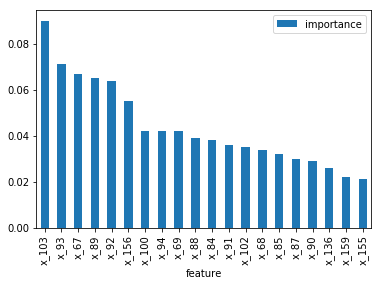

In [22]:
# the feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)
importances.head(20).plot.bar()

In [26]:
## functions to optimize the model
# import scikit learn libraries
from sklearn import cross_validation, metrics   #model optimization and valuation tools
from sklearn.grid_search import GridSearchCV   #Perforing grid search

# define a function that help to train models and perform cv
def modelfit(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):
    """
    This functions train the model given as 'alg' by performing cross-validation. It works on both regression and classification
    alg: sklearn model
    dtrain: pandas.DataFrame, training set
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    scoring_method: str, method to be used by the cross-validation to valuate the model
    performCV: bool, perform Cv or not
    printFeatureImportance: bool, plot histogram of features importance or not
    cv_folds: int, degree of cross-validation
    """
    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        #print model report
        print("\nModel report:")
        if scoring_method == 'roc_auc':
            print("\nAccuracy:")
            print(metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print("\nAUC Score (Train):")
            print(metrics.roc_auc_score(dtrain[target], dtrain_predprob)) 
        if (scoring_method == 'mean_squared_error'):
            print("\nAccuracy:")
            print(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print("CV Score - Mean : "+ str(np.mean(cv_score)) + "| Std :"  + str(np.std(cv_score)) +"| Min : " +str(np.min(cv_score)) +"| Max :" +str(np.max(cv_score))) 
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importe Score')
        plt.show()

# optimize n_estimator through grid search
def optimize_num_trees(alg,param_test,scoring_method,train,predictors,target):
    """
    This functions is used to tune paremeters of a predictive algorithm
    alg: sklearn model,
    param_test: dict, parameters to be tuned
    scoring_method: str, method to be used by the cross-validation to valuate the model
    train: pandas.DataFrame, training data
    predictors: list, labels to be used in the model training process. They should be in the column names of dtrain
    target: str, target variable
    """
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    return gsearch

# plot optimization results
def plot_opt_results(alg):
    cv_results = []
    for i in range(len(param_test['n_estimators'])):
        cv_results.append((alg.grid_scores_[i][1],alg.grid_scores_[i][0]['n_estimators']))
    cv_results = pd.DataFrame(cv_results)
    plt.plot(cv_results[1],cv_results[0])
    plt.xlabel('# trees')
    plt.ylabel('score')
    plt.title('optimization report')

In [43]:
## Fine Tune the random forrest model

## OPTIMIZATION & TRAINING OF THE CLASSIFIER

print("Optimizing the classifier...")


target = 'x_171' # set target variable - it will be used later in optimization


# remove the target var and user id
predictors = train.columns[0:-2]

# optimize n_estimator through grid search
param_test = {'n_estimators':list(range(30,151,20))} # define range over which number of trees is to be optimized

model_cls = RandomForestClassifier(
            max_depth=5,  
            n_estimators=30, 
            max_features='auto',
            random_state = 10
            )

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print([gs_cls.grid_scores_, gs_cls.best_params_, gs_cls.best_score_])


Optimizing the classifier...
[[mean: 0.88913, std: 0.00072, params: {'n_estimators': 30}, mean: 0.89016, std: 0.00062, params: {'n_estimators': 50}, mean: 0.89098, std: 0.00072, params: {'n_estimators': 70}, mean: 0.89111, std: 0.00099, params: {'n_estimators': 90}, mean: 0.89148, std: 0.00084, params: {'n_estimators': 110}, mean: 0.89126, std: 0.00084, params: {'n_estimators': 130}, mean: 0.89128, std: 0.00089, params: {'n_estimators': 150}], {'n_estimators': 110}, 0.8914778738320894]


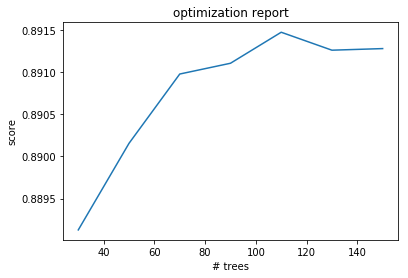

In [44]:
# n_estimator =110 is the optimal number of trees
plot_opt_results(gs_cls)


Model report:

Accuracy:
0.837428483366

AUC Score (Train):
0.889927067824
CV Score - Mean : 0.889126615789| Std :0.000724585664619| Min : 0.887946413376| Max :0.890083570787


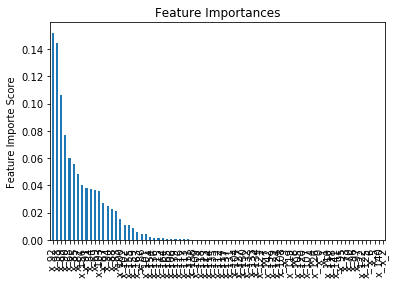

Processing time:0:00:15.504906


In [41]:
tic = dt.datetime.now() # initiate the timing
# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')
# save the best estimator on disk as pickle for a later use
with open('my_classifier.pkl','wb') as fid:
    pickle.dump(gs_cls.best_estimator_,fid)
    fid.close()
    
print ("Processing time:"+ str(dt.datetime.now()-tic))    

In [42]:
# Evaluate the model performance on test data
Y_pred = gs_cls.best_estimator_.predict(X_test)
probs = gs_cls.best_estimator_.predict_proba(X_test)
print("\nAccuracy:")
print( metrics.accuracy_score(Y_test,Y_pred))
print("\nROC score:" )
print(metrics.roc_auc_score(Y_test,probs[:,1]))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(Y_test,Y_pred))
print("\nClassification Report")
print(metrics.classification_report(Y_test,Y_pred))


Accuracy:
0.838091385421

ROC score:
0.886884703567

Confusion Matrix
[[35351  1082]
 [ 7323  8156]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.83      0.97      0.89     36433
        1.0       0.88      0.53      0.66     15479

avg / total       0.84      0.84      0.82     51912

